In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

In [9]:
#Load our diabetes dataset
diabetes=load_diabetes()

#Convert data to a pandas DataFrame
df=pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

#Add target
df['target']=diabetes.target

#Grab head
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [14]:
#Split data into X and y
X=df.drop('target',axis=1)
y=df['target']
X.shape, y.shape

((442, 10), (442,))

In [17]:
from sklearn.model_selection import train_test_split
#split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Print out the shape of the training and testing sets
print("Train sets: ",X_train.shape, y_train.shape)
print("Test sets: ",X_test.shape, y_test.shape)

Train sets:  (353, 10) (353,)
Test sets:  (89, 10) (89,)


In [18]:
from sklearn.linear_model import LinearRegression

#Create a linear Regression model
lr=LinearRegression()

In [19]:
#Train the model on the training set - this is how model learns
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
#Predict on the testing set
#Predict values based on features
y_pred = lr.predict(X_test)
y_pred.shape

(89,)

In [21]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Evaluation

#variance of the dependent variable, how well model fits, higher is better
r2=r2_score(y_true=y_test, y_pred=y_pred) 

#average squared distance between predicted and actual, lower is better
mse=mean_squared_error(y_true=y_test, y_pred=y_pred)

#average abs distance between predicted and actual, lower is better
mae=mean_absolute_error(y_true=y_test, y_pred=y_pred)

#starting point of the regression line on the y-axis
#value of target when features are zero
intercept=lr.intercept_

print("R2 score: ", r2)
print("MSE: ", mse)
print("MAE: ", mae)
print("Intercept: ", intercept)

R2 score:  0.4526027629719197
MSE:  2900.19362849348
MAE:  42.79409467959994
Intercept:  151.34560453985995


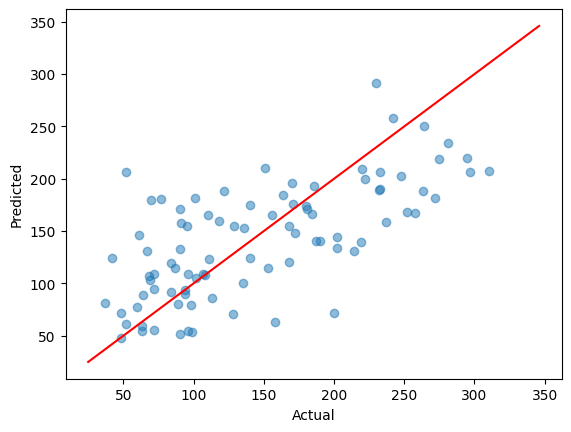

In [43]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred,alpha=0.5)
plt.plot([y.min(), y.max()],[y.min(), y.max()], color="red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

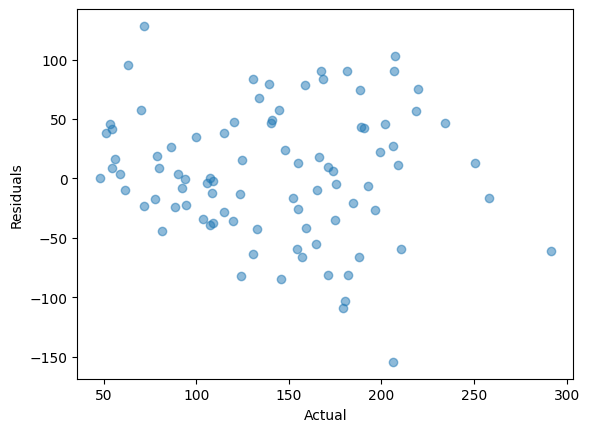

In [44]:
#Plot the residuals
plt.scatter(y_pred, y_test-y_pred,alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Residuals")
plt.show()